In [1]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns





In [2]:
# prompt: read my csv file name as /content/50_Startups.csv

df = pd.read_csv('/content/50_Startups.csv')


In [3]:
# prompt: display first few rows

df.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
# prompt: list of columns

print(df.columns.tolist())


['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit']


In [6]:
# prompt: Mean, median, variance, skewness, kurtosis for all numeric columns

# Assuming 'df' is your DataFrame (as defined in the previous code)

numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
  print(f"Column: {col}")
  print(f"  Mean: {df[col].mean()}")
  print(f"  Median: {df[col].median()}")
  print(f"  Variance: {df[col].var()}")
  print(f"  Skewness: {df[col].skew()}")
  print(f"  Kurtosis: {df[col].kurt()}")
  print("-" * 20)

Column: R&D Spend
  Mean: 73721.6156
  Median: 73051.08
  Variance: 2107017150.167544
  Skewness: 0.164002172321177
  Kurtosis: -0.7614645568424674
--------------------
Column: Administration
  Mean: 121344.63960000001
  Median: 122699.795
  Variance: 784997271.2454693
  Skewness: -0.4890248099671768
  Kurtosis: 0.22507113536865386
--------------------
Column: Marketing Spend
  Mean: 211025.09780000002
  Median: 212716.24
  Variance: 14954920097.42379
  Skewness: -0.04647226758360412
  Kurtosis: -0.6717011281297514
--------------------
Column: Profit
  Mean: 112012.63920000002
  Median: 107978.19
  Variance: 1624588173.411208
  Skewness: 0.023291019769116614
  Kurtosis: -0.06385888546853113
--------------------


In [7]:
df.isnull().sum()

,0
R&D Spend,0
Administration,0
Marketing Spend,0
State,0
Profit,0


In [8]:
df.dtypes

,0
R&D Spend,float64
Administration,float64
Marketing Spend,float64
State,object
Profit,float64


In [9]:
# prompt: ANOVA for State column to Profit

import statsmodels.formula.api as sm
from statsmodels.stats.anova import anova_lm # Import anova_lm

# Assuming 'df' is your DataFrame and 'State' and 'Profit' are column names
# Fit the ANOVA model
model = sm.ols('Profit ~ C(State)', data=df).fit()

# Print the ANOVA table
print(anova_lm(model, typ=2)) # Call anova_lm directly


                sum_sq    df         F    PR(>F)
C(State)  1.900582e+09   2.0  0.574791  0.566729
Residual  7.770424e+10  47.0       NaN       NaN


In [10]:
import scipy.stats as stats

# Group Profit by State categories
florida_profit = df[df['State'] == 'Florida']['Profit']
newyork_profit = df[df['State'] == 'New York']['Profit']
california_profit = df[df['State'] == 'California']['Profit']

# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(florida_profit, newyork_profit, california_profit)
print("ANOVA Test:")
print(f"F-statistic: {f_stat}, P-value: {p_value}")

# Interpretation:
if p_value < 0.05:
    print("There is a statistically significant difference in Profit across States.")
else:
    print("No statistically significant difference in Profit across States.")

ANOVA Test:
F-statistic: 0.5747908867225175, P-value: 0.5667290310967406
No statistically significant difference in Profit across States.


In [11]:
# prompt: check for outlines in numerical column

# Assuming 'df' is your DataFrame and you want to check for outliers in numerical columns

numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    # Method 1: Using IQR (Interquartile Range)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outliers in {col} (IQR method):")
    print(outliers)

    # Method 2: Using Z-score
    z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
    outliers_z = df[z_scores > 3]  # Consider values with a Z-score greater than 3 as outliers
    print(f"\nOutliers in {col} (Z-score method):")
    print(outliers_z)

    print("-" * 20)

Outliers in R&D Spend (IQR method):
Empty DataFrame
Columns: [R&D Spend, Administration, Marketing Spend, State, Profit]
Index: []

Outliers in R&D Spend (Z-score method):
Empty DataFrame
Columns: [R&D Spend, Administration, Marketing Spend, State, Profit]
Index: []
--------------------
Outliers in Administration (IQR method):
Empty DataFrame
Columns: [R&D Spend, Administration, Marketing Spend, State, Profit]
Index: []

Outliers in Administration (Z-score method):
Empty DataFrame
Columns: [R&D Spend, Administration, Marketing Spend, State, Profit]
Index: []
--------------------
Outliers in Marketing Spend (IQR method):
Empty DataFrame
Columns: [R&D Spend, Administration, Marketing Spend, State, Profit]
Index: []

Outliers in Marketing Spend (Z-score method):
Empty DataFrame
Columns: [R&D Spend, Administration, Marketing Spend, State, Profit]
Index: []
--------------------
Outliers in Profit (IQR method):
    R&D Spend  Administration  Marketing Spend       State   Profit
49        0.0

In [12]:
# prompt: no of outliers in Profit column

# Assuming 'df' is your DataFrame and 'Profit' is the column name

# Method 1: Using IQR (Interquartile Range)
Q1 = df['Profit'].quantile(0.25)
Q3 = df['Profit'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = df[(df['Profit'] < lower_bound) | (df['Profit'] > upper_bound)]
num_outliers_iqr = len(outliers_iqr)
print(f"Number of outliers in 'Profit' (IQR method): {num_outliers_iqr}")

# Method 2: Using Z-score
z_scores = np.abs((df['Profit'] - df['Profit'].mean()) / df['Profit'].std())
outliers_zscore = df[z_scores > 3]  # Consider values with a Z-score greater than 3 as outliers
num_outliers_zscore = len(outliers_zscore)
print(f"Number of outliers in 'Profit' (Z-score method): {num_outliers_zscore}")

Number of outliers in 'Profit' (IQR method): 1
Number of outliers in 'Profit' (Z-score method): 0


Correlation Matrix:
                 R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000


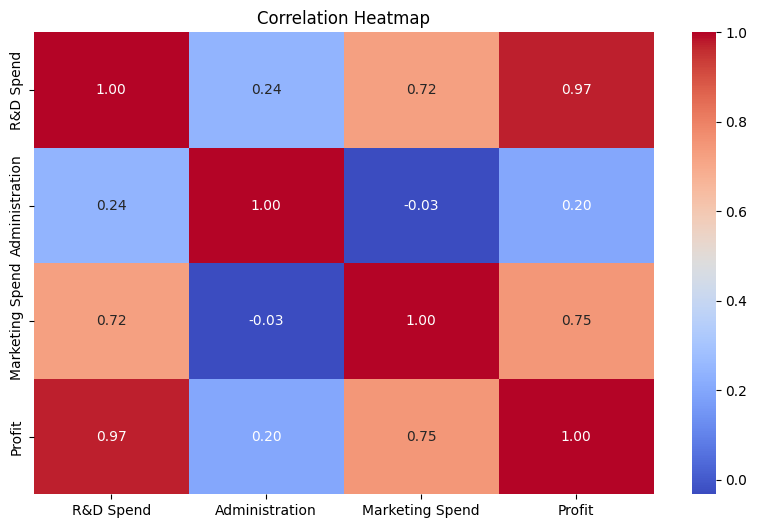

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure only numeric columns are included for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64', 'bool'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [14]:
# prompt: linear regression model of my data x-varibale as "R&D Spend" and y-is "Profit"

import statsmodels.api as sm

# Define the independent and dependent variables
X = df[['R&D Spend']]
y = df['Profit']

# Add a constant to the independent variables (intercept term)
X = sm.add_constant(X)

# Create and fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Tue, 10 Dec 2024   Prob (F-statistic):           3.50e-32
Time:                        07:41:03   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.0

In [15]:
# Extract and print the regression equation from statsmodels without FutureWarnings
ols_intercept = model.params.iloc[0]  # Constant # Change ols_model to model
ols_coefficient = model.params.iloc[1]  # Coefficient for R&D Spend # Change ols_model to model

print("\nRegression Model Equation (Statsmodels):")
print(f"Profit = {ols_intercept:.2f} + ({ols_coefficient:.2f} * R&D Spend)")


Regression Model Equation (Statsmodels):
Profit = 49032.90 + (0.85 * R&D Spend)


In [16]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select features based on correlation
# Using R&D Spend, Marketing Spend as predictors (high correlation with Profit)
X = df[['R&D Spend', 'Marketing Spend']]
y = df['Profit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Display coefficients
print("\nModel Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")

# Add constant for intercept in statsmodels
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Statsmodels for detailed summary
ols_model = sm.OLS(y_train, X_train_sm).fit()
print("\nOLS Regression Summary:")
print(ols_model.summary())

Mean Squared Error: 67343832.58979616
R-squared: 0.9168381183550246

Model Coefficients:
R&D Spend: 0.7833743148902921
Marketing Spend: 0.03923978714553163

OLS Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     366.0
Date:                Tue, 10 Dec 2024   Prob (F-statistic):           4.19e-25
Time:                        07:41:19   Log-Likelihood:                -421.40
No. Observations:                  40   AIC:                             848.8
Df Residuals:                      37   BIC:                             853.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef   

In [17]:
# prompt: Print the regression equation

# Extract and print the regression equation from statsmodels without FutureWarnings
# Use ols_model (statsmodels) to get the parameters
ols_intercept = ols_model.params.iloc[0]  # Constant
ols_coefficient_rd = ols_model.params.iloc[1]  # Coefficient for R&D Spend
ols_coefficient_marketing = ols_model.params.iloc[2] # Coefficient for Marketing Spend

print("\nRegression Model Equation (Statsmodels):")
print(f"Profit = {ols_intercept:.2f} + ({ols_coefficient_rd:.2f} * R&D Spend) + ({ols_coefficient_marketing:.2f} * Marketing Spend)")


Regression Model Equation (Statsmodels):
Profit = 45542.39 + (0.78 * R&D Spend) + (0.04 * Marketing Spend)


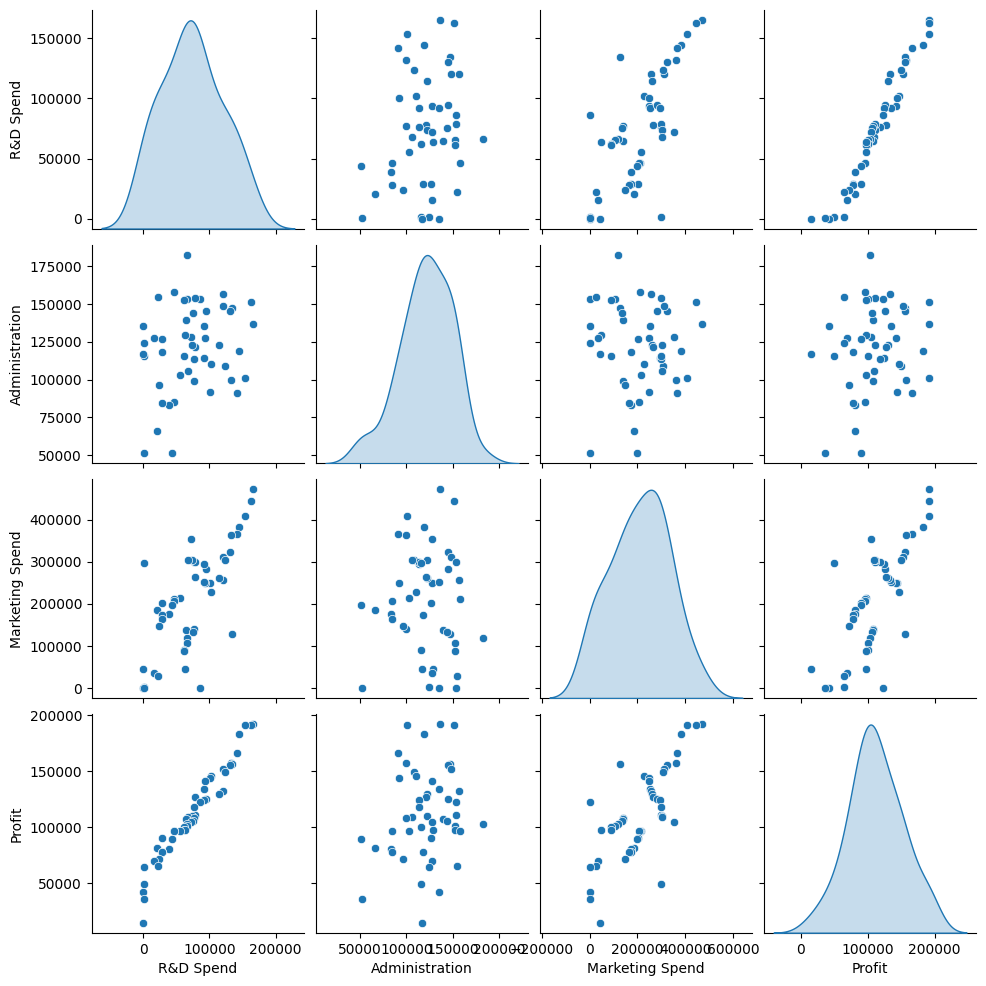

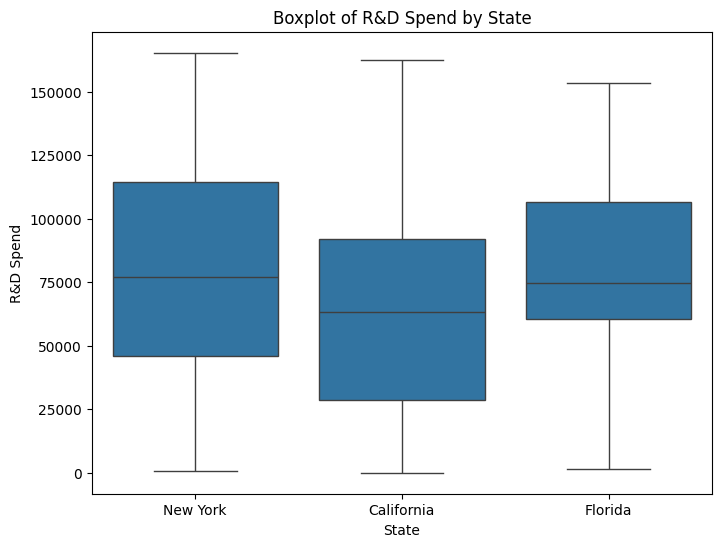

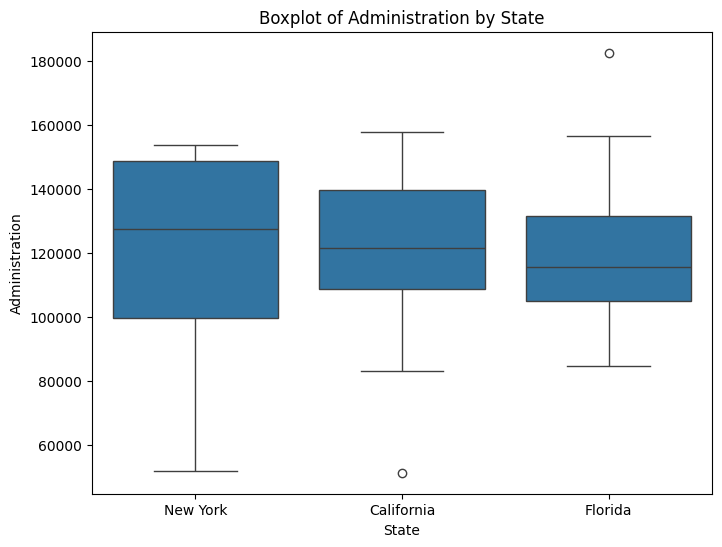

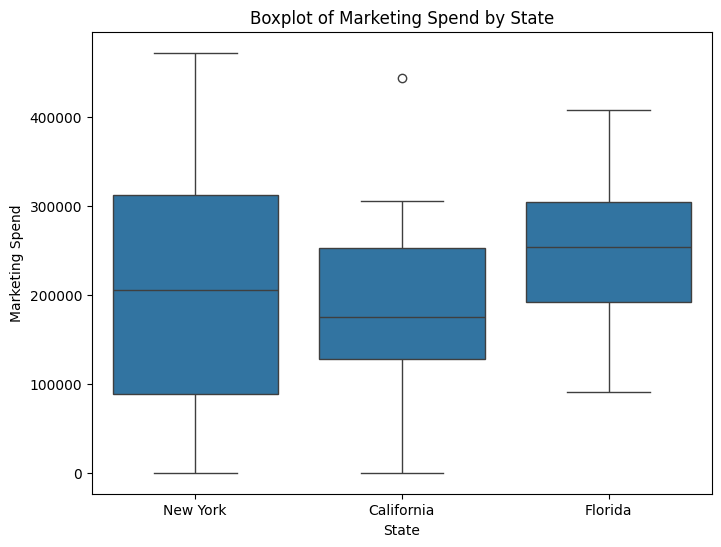

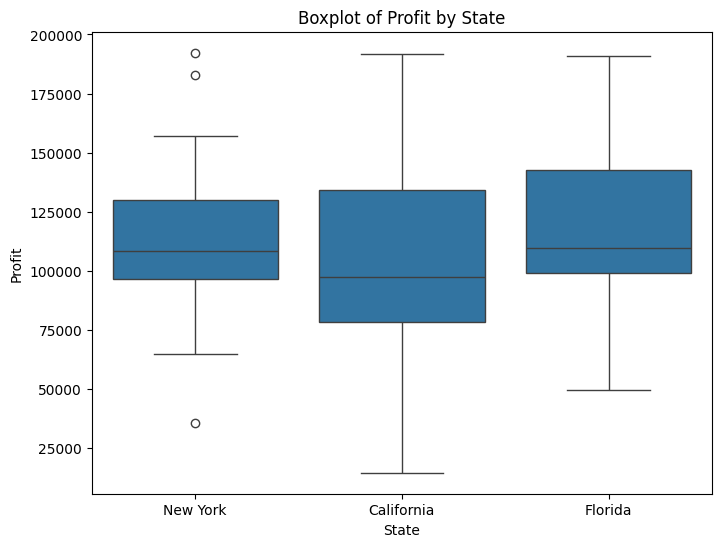

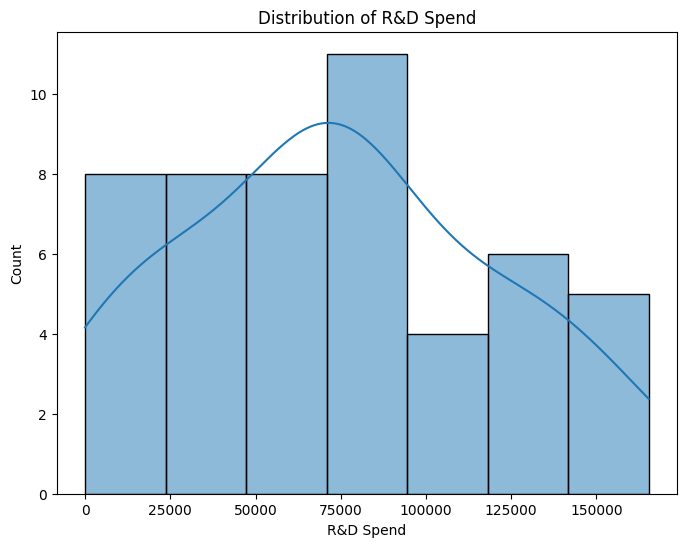

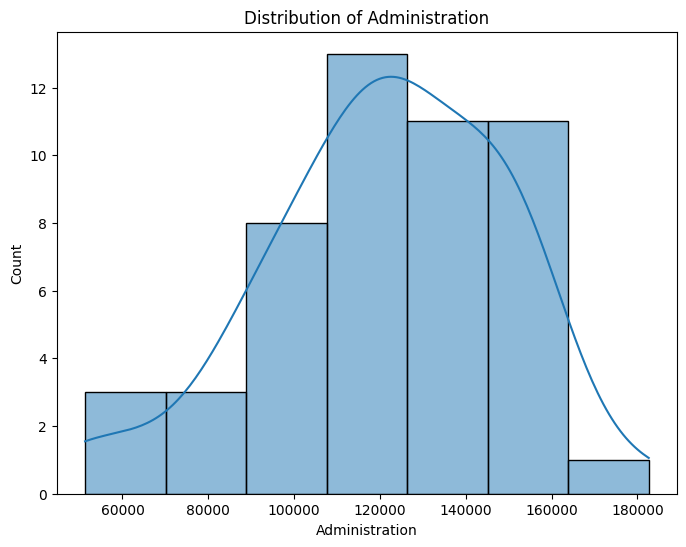

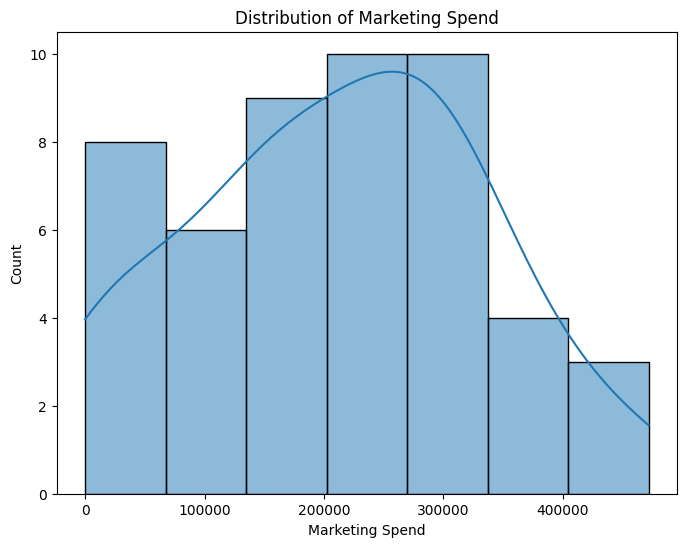

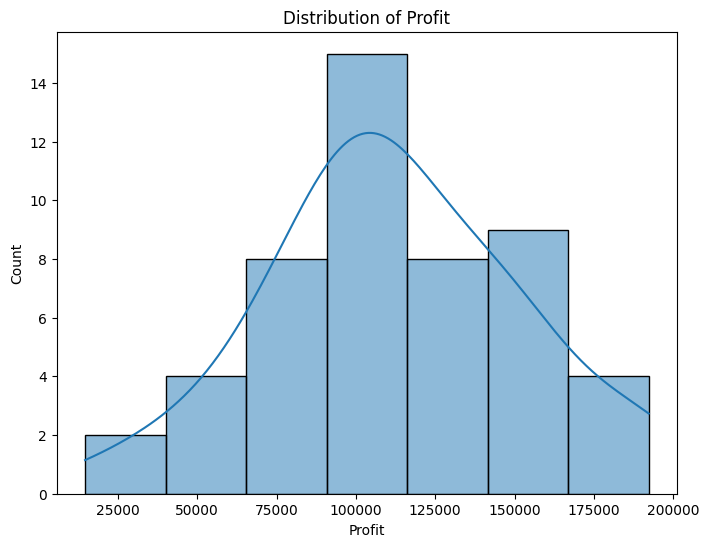

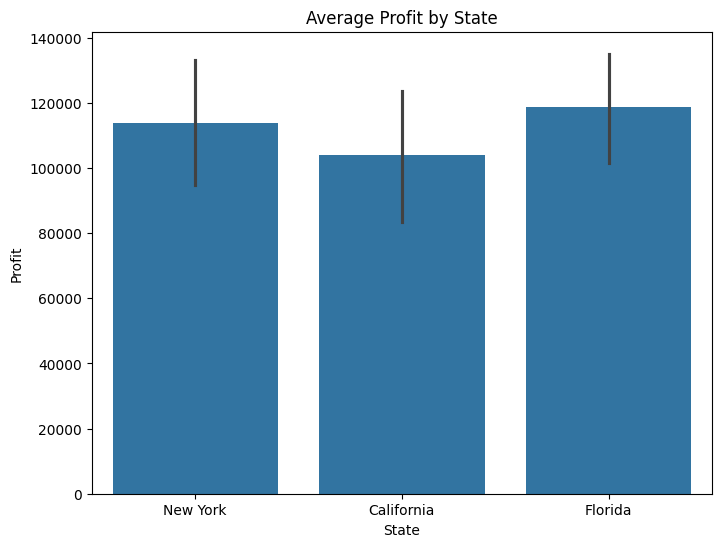

In [18]:
# prompt: eda for the df

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
from statsmodels.stats.anova import anova_lm # Import anova_lm
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'df' is your DataFrame (as defined in the previous code)
# ... (Your existing EDA code from the previous response)

# Additional EDA steps (examples):

# 1. Pairplot to visualize relationships between numerical features
sns.pairplot(df, diag_kind='kde')
plt.show()

# 2. Box plots for numerical features by State category (to visualize distributions within each group)
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='State', y=col, data=df)
    plt.title(f'Boxplot of {col} by State')
    plt.show()

# 3. Distribution plots for numerical features
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# 4. Explore relationships between categorical and numerical features (example: State vs. Profit)
plt.figure(figsize=(8, 6))
sns.barplot(x='State', y='Profit', data=df)
plt.title('Average Profit by State')
plt.show()


# ... (Rest of your existing EDA code)